In [149]:
#import stuff here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

In [150]:
dataset = pd.read_excel('/Users/qinrenkang/Desktop/MI/Qinzi-Yu-2178/QINZI-YU-A2/INF2178_A2_data.xlsx', sheet_name=0)

In [151]:
dataset.describe()

,_id,LOC_ID,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,532.000000,8087.888053,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,307.005972,5151.252693,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,1013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,266.500000,1862.000000,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,532.000000,8826.000000,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,797.500000,13245.000000,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,1063.000000,14504.000000,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


In [152]:
dataset.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [153]:
# One way ANOVA
# Q: Does the operating auspice (AUSPICE) affect the total space (TOTSPACE) available in child care centres?
# Prepare data for analysis: operating auspice vs. total space
data_auspice_tot = dataset[['AUSPICE', 'TOTSPACE']].copy()

# reshape the d dataframe suitable for statsmodels package
data_auspice_tot_melt = pd.melt(data_auspice_tot, id_vars=['AUSPICE'])

In [154]:
# check the reshaped dataframe
data_auspice_tot_melt.head(10)

,AUSPICE,variable,value
0,Non Profit Agency,TOTSPACE,164
1,Non Profit Agency,TOTSPACE,83
2,Non Profit Agency,TOTSPACE,102
3,Non Profit Agency,TOTSPACE,65
4,Non Profit Agency,TOTSPACE,26
5,Non Profit Agency,TOTSPACE,62
6,Non Profit Agency,TOTSPACE,49
7,Commercial Agency,TOTSPACE,46
8,Non Profit Agency,TOTSPACE,51
9,Non Profit Agency,TOTSPACE,153


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use s

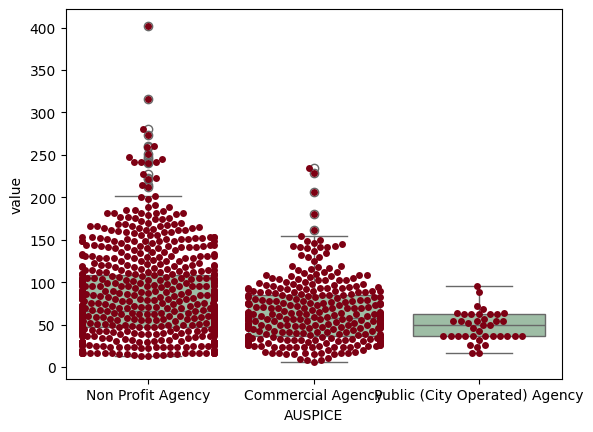

In [155]:
# generate a boxplot to see the data distribution by AUSPICE. Using boxplot, we can
# easily detect the differences among different AUSPICE
ax = sns.boxplot(x='AUSPICE', y='value', data=data_auspice_tot_melt, color='#99c2a2', native_scale=True)
ax = sns.swarmplot(x="AUSPICE", y="value", data=data_auspice_tot_melt, color='#7d0013', native_scale=True)
plt.show()

In [156]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(AUSPICE)', data=data_auspice_tot_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [157]:
# ANOVA table
res = stat()
res.anova_stat(df=data_auspice_tot_melt, res_var='value', anova_model='value ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [158]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming data_auspice_tot is your DataFrame with 'AUSPICE' and 'TOTSPACE' ready for analysis
tukey_hsd_result = pairwise_tukeyhsd(endog=data_auspice_tot['TOTSPACE'], 
                                     groups=data_auspice_tot['AUSPICE'], 
                                     alpha=0.05)

# Printing the summary table of the Tukey HSD test
print(tukey_hsd_result.summary())

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


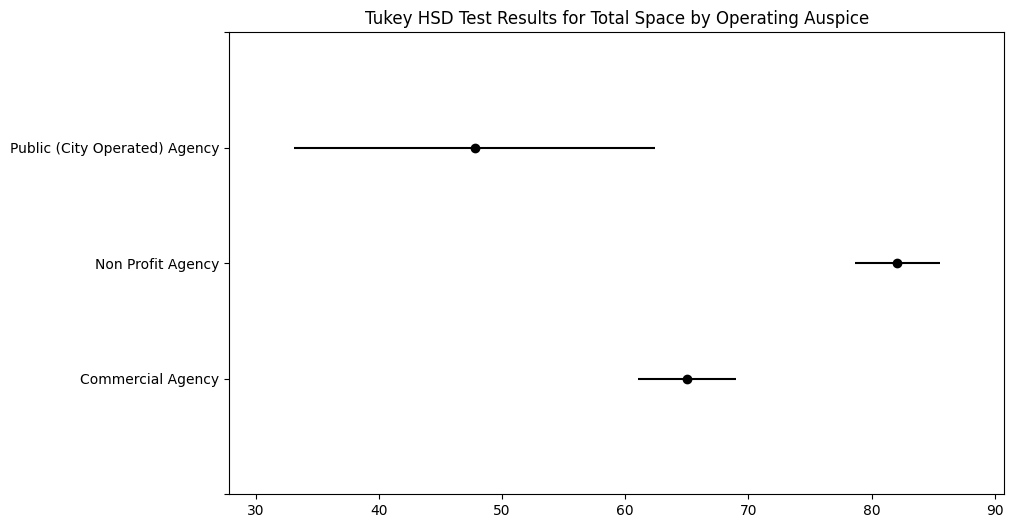

In [159]:
tukey_hsd_result.plot_simultaneous()
plt.title('Tukey HSD Test Results for Total Space by Operating Auspice')
plt.show()

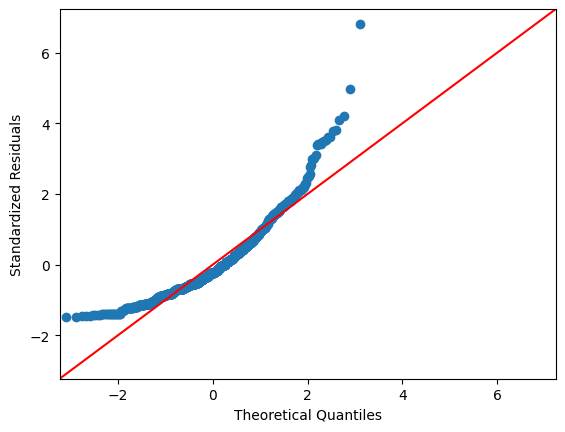

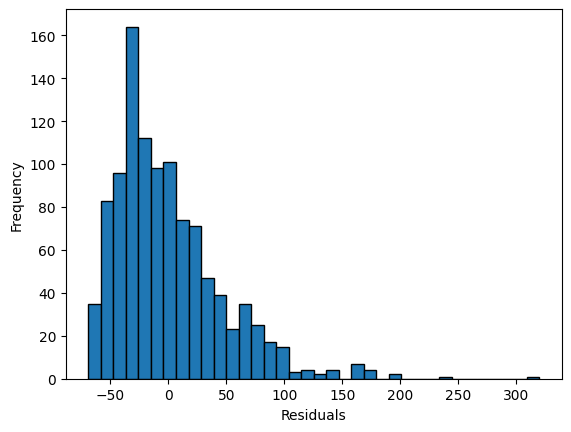

In [160]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [161]:
# Data Cleaning for AUSPICE and TOTSPACE

# Step 1: Calculate Q1, Q3, and IQR for each 'AUSPICE'
Q1 = data_auspice_tot.groupby('AUSPICE')['TOTSPACE'].quantile(0.25)
Q3 = data_auspice_tot.groupby('AUSPICE')['TOTSPACE'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
# Create a mask for each 'AUSPICE' to filter out outliers
mask = data_auspice_tot.apply(lambda x: (x['TOTSPACE'] >= lower_bound[x['AUSPICE']]) & (x['TOTSPACE'] <= upper_bound[x['AUSPICE']]), axis=1)

# Apply the mask to filter the dataset
filtered_data = data_auspice_tot[mask]

# You can compare the shapes before and after to see how many outliers were removed
original_shape = data_auspice_tot.shape[0]
filtered_shape = filtered_data.shape[0]

print(f"Original shape: {original_shape}, Filtered shape: {filtered_shape}")

Original shape: 1063, Filtered shape: 1040


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3370: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


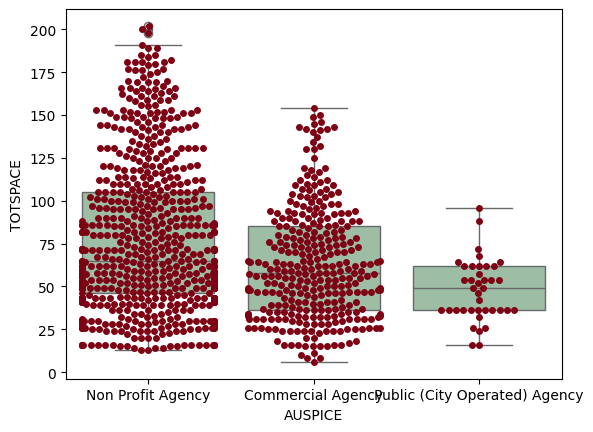

In [162]:
# generate a boxplot to see the data distribution by AUSPICE. Using boxplot, we can
# easily detect the differences among different AUSPICE
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=filtered_data, color='#99c2a2', native_scale=True)
ax = sns.swarmplot(x="AUSPICE", y="TOTSPACE", data=filtered_data, color='#7d0013', native_scale=True)
plt.show()

In [163]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data=filtered_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),7.060043e+04,2.0,22.292641,3.317236e-10
Residual,1.642081e+06,1037.0,NaN,NaN


In [164]:
# ANOVA table
res1 = stat()
res1.anova_stat(df=filtered_data, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res1.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,7.060043e+04,35300.214256,22.292641,3.317236e-10
Residual,1037.0,1.642081e+06,1583.491776,NaN,NaN


In [165]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming data_auspice_tot is your DataFrame with 'AUSPICE' and 'TOTSPACE' ready for analysis
tukey_hsd_result1 = pairwise_tukeyhsd(endog=filtered_data['TOTSPACE'], 
                                     groups=filtered_data['AUSPICE'], 
                                     alpha=0.05)

# Printing the summary table of the Tukey HSD test
print(tukey_hsd_result1.summary())

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
      group1                  group2            meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  14.7283    0.0    8.377 21.0796   True
Commercial Agency Public (City Operated) Agency -15.0441 0.0671 -30.8957  0.8076  False
Non Profit Agency Public (City Operated) Agency -29.7724    0.0 -45.1478 -14.397   True
---------------------------------------------------------------------------------------


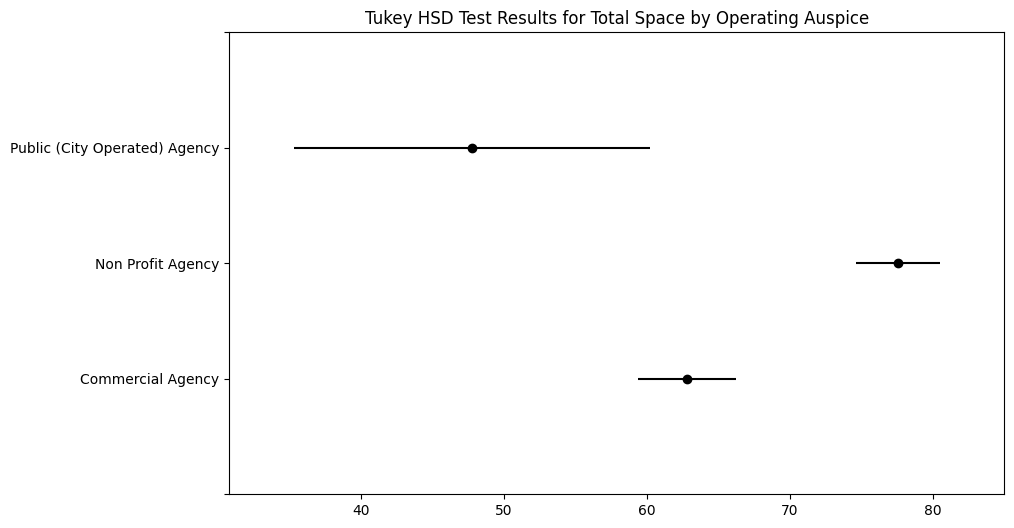

In [166]:
tukey_hsd_result1.plot_simultaneous()
plt.title('Tukey HSD Test Results for Total Space by Operating Auspice')
plt.show()

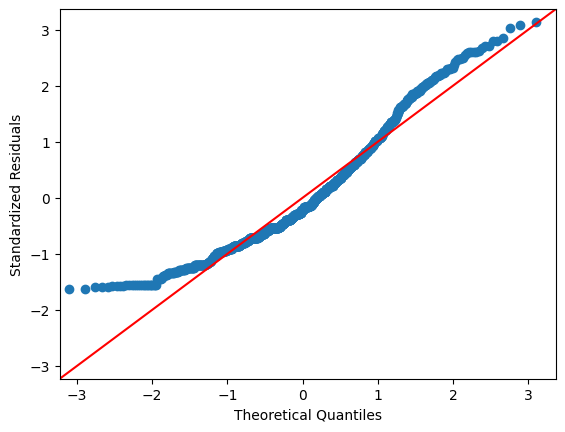

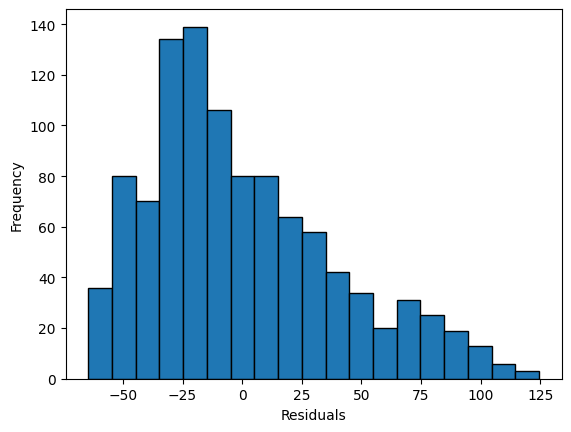

In [167]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res1.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res1.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

## Two way ANOVA 
#### Does the interaction between operating auspice (AUSPICE) and building type (bldg_type) have a significant effect on the total space available (TOTSPACE) in child care centres?

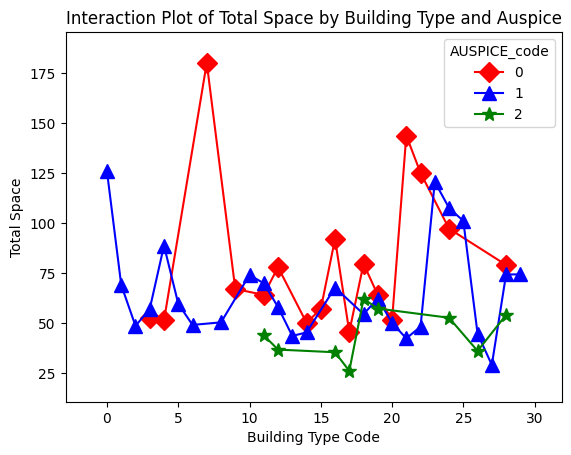

In [168]:
from statsmodels.graphics.factorplots import interaction_plot

# Convert categorical variables to codes for interaction plot
dataset['bldg_type_code'] = dataset['bldg_type'].astype('category').cat.codes
dataset['AUSPICE_code'] = dataset['AUSPICE'].astype('category').cat.codes

# Interaction plot
fig = interaction_plot(dataset['bldg_type_code'], dataset['AUSPICE_code'], dataset['TOTSPACE'],
                       colors=['red', 'blue', 'green'], markers=['D', '^', '*'], ms=10)

plt.xlabel('Building Type Code')
plt.ylabel('Total Space')
plt.title('Interaction Plot of Total Space by Building Type and Auspice')
plt.show()

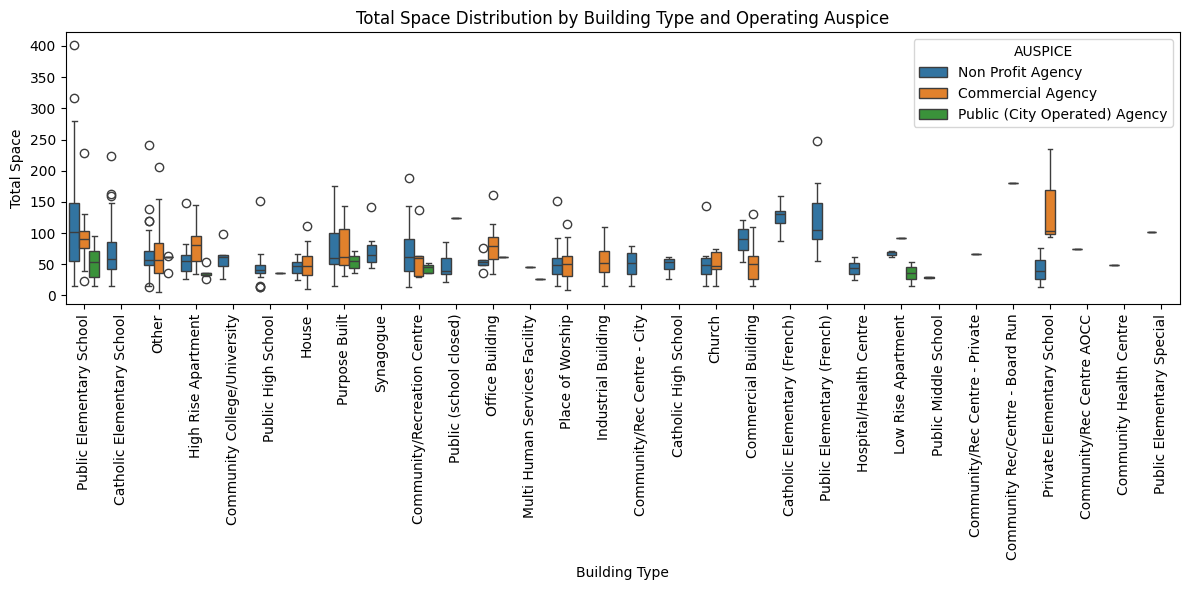

In [169]:
# Filter dataset for relevant columns
data_for_2anova = dataset[['bldg_type', 'AUSPICE', 'TOTSPACE']].copy()

# Box plot to visualize the distribution of TOTSPACE across combinations of bldg_type and AUSPICE
plt.figure(figsize=(12, 6))
sns.boxplot(x='bldg_type', y='TOTSPACE', hue='AUSPICE', data=data_for_2anova)
plt.xticks(rotation=90)
plt.title('Total Space Distribution by Building Type and Operating Auspice')
plt.ylabel('Total Space')
plt.xlabel('Building Type')
plt.tight_layout()

plt.show()

In [170]:
data_melted = pd.melt(data_for_2anova, id_vars=['bldg_type', 'AUSPICE'], value_vars=['TOTSPACE'], value_name='Value')
data_melted.head()

,bldg_type,AUSPICE,variable,Value
0,Public Elementary School,Non Profit Agency,TOTSPACE,164
1,Public Elementary School,Non Profit Agency,TOTSPACE,83
2,Catholic Elementary School,Non Profit Agency,TOTSPACE,102
3,Other,Non Profit Agency,TOTSPACE,65
4,High Rise Apartment,Non Profit Agency,TOTSPACE,26


In [171]:
model_2way_anova = ols('TOTSPACE ~ C(bldg_type) * C(AUSPICE)', data=data_for_2anova).fit()
anova_results_2way = sm.stats.anova_lm(model_2way_anova, typ=2)

print(anova_results_2way)

                               sum_sq      df             F        PR(>F)
C(bldg_type)             9.582108e+05    29.0  1.819840e+01  2.921140e-28
C(AUSPICE)              -2.755934e-08     2.0 -7.589427e-12  1.000000e+00
C(bldg_type):C(AUSPICE)  2.622099e+05    58.0  2.489954e+00  6.381552e-06
Residual                 1.835612e+06  1011.0           NaN           NaN


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 58, but rank is 34
  warnings.warn('covariance of constraints does not have full '


In [172]:
# Tukey's HSD test to understand specific group differences for 'bldg_type' within each 'AUSPICE' category
tukey = pairwise_tukeyhsd(endog=data_for_2anova['TOTSPACE'], groups=data_for_2anova['bldg_type'], alpha=0.05)
print(tukey.summary())

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
             group1                           group2               meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------------------------------------------
    Catholic Elementary (French)       Catholic Elementary School  -56.7497 0.1543 -119.6741   6.1747  False
    Catholic Elementary (French)             Catholic High School  -77.2143 0.4913 -178.4734  24.0448  False
    Catholic Elementary (French)                           Church  -71.3393 0.0685 -144.5495   1.8709  False
    Catholic Elementary (French)              Commercial Building  -69.7976 0.0465  -139.195  -0.4003   True
    Catholic Elementary (French)     Community College/University  -66.1143 0.6864 -160.7104  28.4818  False
    Catholic Elementary (French)          Community Health Centre  -76.7143 0.9986 -249.4224  95.9938  False
    Catholic Elemen

Text(0.5, 1.0, 'Tukey HSD Test Results for Total Space by Building Type')

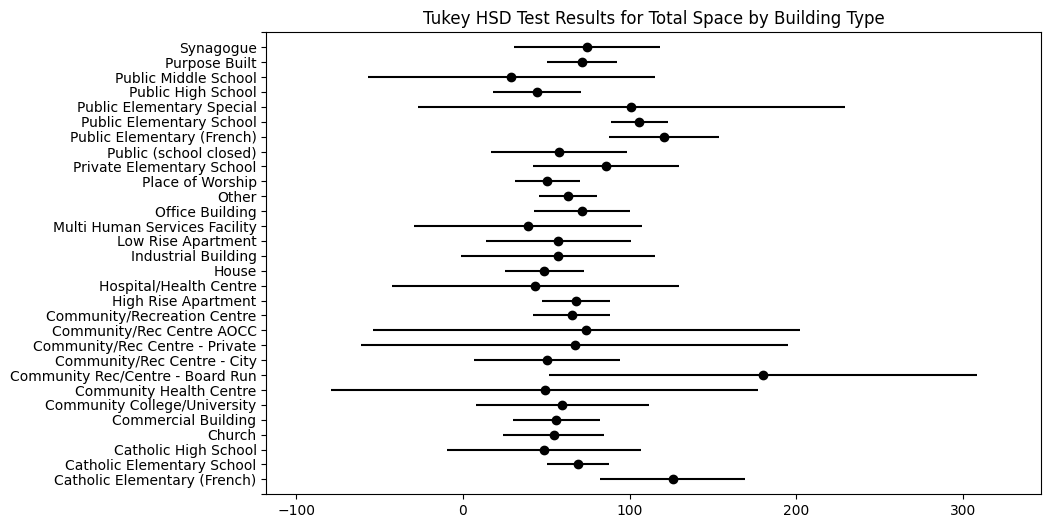

In [173]:
# Plotting the results
tukey_hsd.plot_simultaneous()
plt.title('Tukey HSD Test Results for Total Space by Building Type')